# Compare normalized and non-normalized cases

In [1]:
import crosspower as cp
import FisherCl as fcl # branch master
#import camb

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

In [21]:
# load saved Fobjs

#import FisherCl2 as fcl
import pickle

# the one with doNorm = False
filehandler2 = open('Fisher_4_4g_Dal.obj', 'r') 
Fobj2 = pickle.load(filehandler2) 
lmax = Fobj2.lmax

# the one with doNorm = True
filehandler3 = open('Fisher_4_4A.obj','r') # first save: lmax=1000, nonlinear=True, ABoost=3, doNorm=True
#filehandler3 = open('Fisher_4_4f_Dal.obj', 'r') 
Fobj3 = pickle.load(filehandler3) 
lmax = Fobj3.lmax


print Fobj2.obsList
print Fobj2.paramList
print Fobj2.lmax

print Fobj3.obsList
print Fobj3.paramList
print Fobj3.lmax



[  0.   1.   2.   3.   4.   6.   7.   8.   9.  12.  13.  14.  18.  19.  24.]
['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w', 'bin1', 'bin2', 'bin3', 'bin4']
1000
[  0.   1.   2.   3.   4.   6.   7.   8.   9.  12.  13.  14.  18.  19.  24.]
['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w', 'bin1', 'bin2', 'bin3', 'bin4']
1000


In [22]:
lmin=50
Fij2 = makeFisher(Fobj2,lmin,lmax)
sigmas2 = np.sqrt(np.diag(np.linalg.inv(Fij2)))

lmin=50
Fij3 = makeFisher(Fobj3,lmin,lmax)
sigmas3 = np.sqrt(np.diag(np.linalg.inv(Fij3)))


building Fisher matrix from components...
invCov.shape:  (15, 15, 999) , dClVecs.shape:  (15, 12, 999)
starting bin set  1  of  12
starting bin set  2  of  12
starting bin set  3  of  12
starting bin set  4  of  12
starting bin set  5  of  12
starting bin set  6  of  12
starting bin set  7  of  12
starting bin set  8  of  12
starting bin set  9  of  12
starting bin set  10  of  12
starting bin set  11  of  12
starting bin set  12  of  12
creation of Fisher Matrix complete!

building Fisher matrix from components...
invCov.shape:  (15, 15, 999) , dClVecs.shape:  (15, 12, 999)
starting bin set  1  of  12
starting bin set  2  of  12
starting bin set  3  of  12
starting bin set  4  of  12
starting bin set  5  of  12
starting bin set  6  of  12
starting bin set  7  of  12
starting bin set  8  of  12
starting bin set  9  of  12
starting bin set  10  of  12
starting bin set  11  of  12
starting bin set  12  of  12
creation of Fisher Matrix complete!



In [23]:
paramList = Fobj2.paramList
from prettytable import PrettyTable
t = PrettyTable(['Parameter', 'sigma_NF(k,g)','sigma_NT(k,g)','percent diff.'])
for i,p in enumerate(paramList):
    NF = sigmas2[i]
    NT = sigmas3[i]
    diff = (NF-NT)/NF *100
    t.add_row([p,"%5.3g" % NF,"%5.3g" % NT, "%5.3g" % diff ] )
print t


+---------------+---------------+---------------+---------------+
|   Parameter   | sigma_NF(k,g) | sigma_NT(k,g) | percent diff. |
+---------------+---------------+---------------+---------------+
|     ombh2     |    0.000827   |    0.00029    |      64.9     |
|     omch2     |    0.00192    |    0.00087    |      54.6     |
| cosmomc_theta |    3.39e-05   |    1.93e-05   |      42.9     |
|       As      |     5e-11     |    1.63e-11   |      67.4     |
|       ns      |    0.00663    |    0.00293    |      55.9     |
|      tau      |      5.58     |     0.961     |      82.8     |
|      mnu      |     0.0317    |     0.0156    |      50.8     |
|       w       |     0.0306    |     0.017     |      44.4     |
|      bin1     |     0.0329    |     0.0128    |      61.3     |
|      bin2     |     0.044     |     0.0182    |      58.7     |
|      bin3     |     0.0597    |     0.0243    |      59.2     |
|      bin4     |     0.0759    |     0.0303    |      60.1     |
+---------

In [24]:
# ratio of covariance matrices should leave matrix of powers of normalization factors, and be singular
covRatio = Fobj3.covar/Fobj2.covar
print covRatio.shape
covRatioInv = np.transpose(np.linalg.inv(np.transpose(covRatio)))
print covRatioInv.shape
print Fobj2.ells[0],Fobj2.ells[-1]
print Fobj3.ells[0],Fobj3.ells[-1]

(15, 15, 999)
(15, 15, 999)
2.0 1000.0
2.0 1000.0


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


In [25]:
# check the power spectra for blips or worse
# Fobj3 is the normalized 4,4 one
print Fobj3.crossCls.shape
print Fobj3.crossClsPlus.shape
print Fobj3.crossClsMinus.shape
# example: (3,3,999) means 999 symmetric 3x3 matrices, one at each ell
nMaps = Fobj3.nBins+1
ells = Fobj3.ells
print 'nMaps = ',nMaps
nCosParams = Fobj3.nParams - Fobj3.nBins
print 'nCosParams = ',nCosParams
paramList = Fobj3.paramList
print 'paramList = ',paramList

(5, 5, 999)
(5, 5, 8, 999)
(5, 5, 8, 999)
nMaps =  5
nCosParams =  8
paramList =  ['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w', 'bin1', 'bin2', 'bin3', 'bin4']


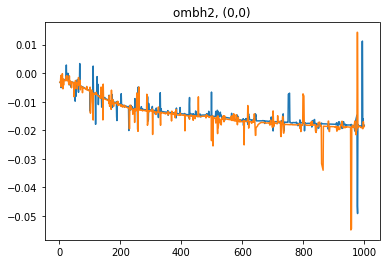

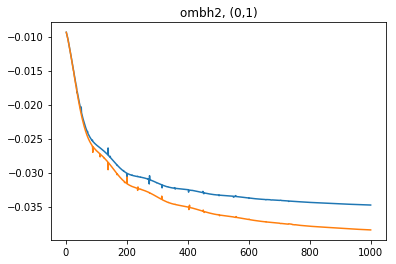

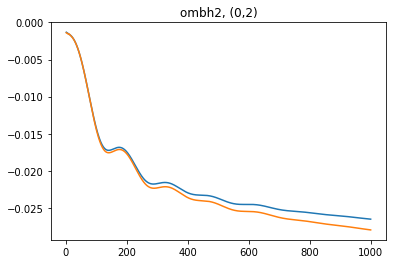

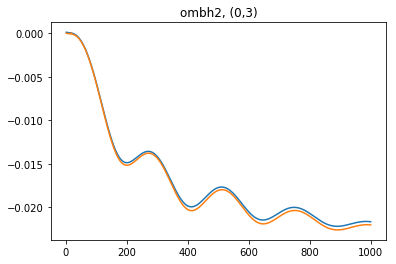

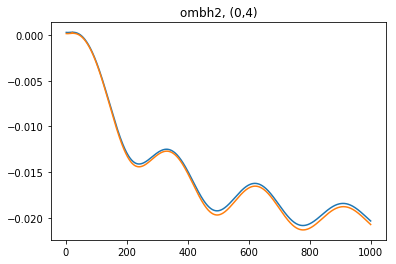

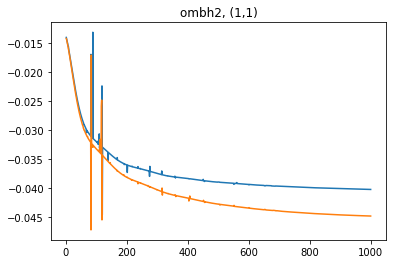

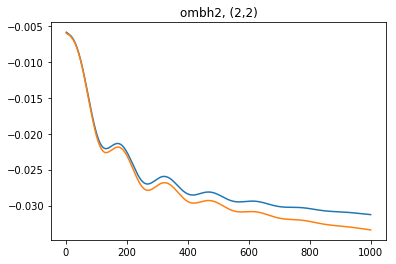

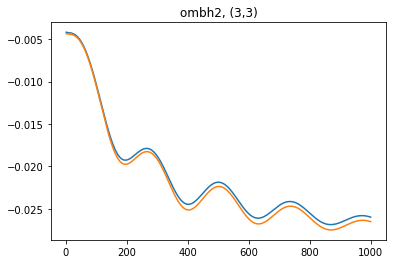

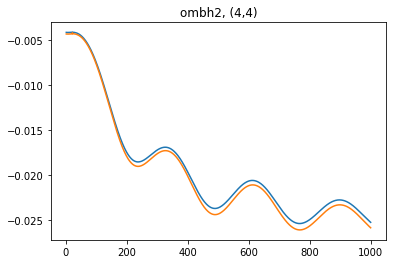

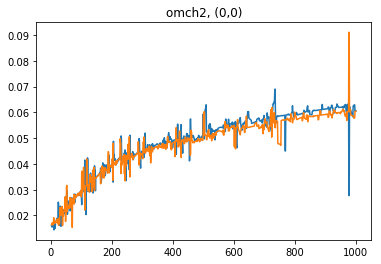

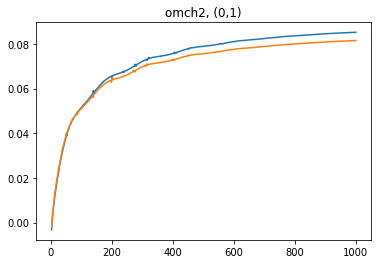

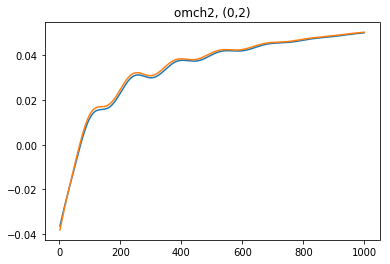

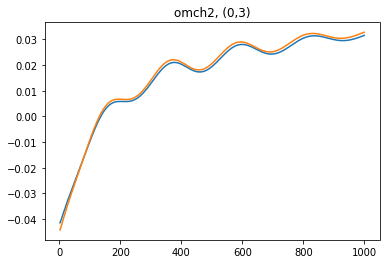

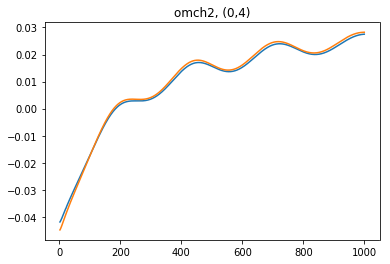

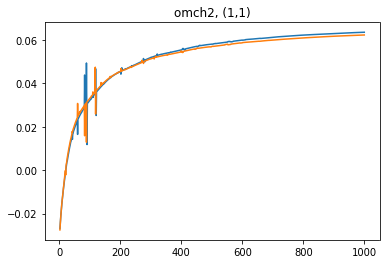

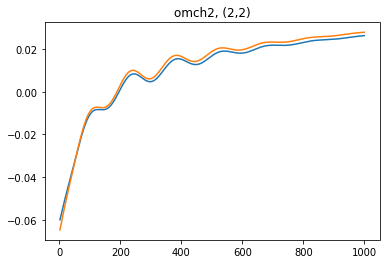

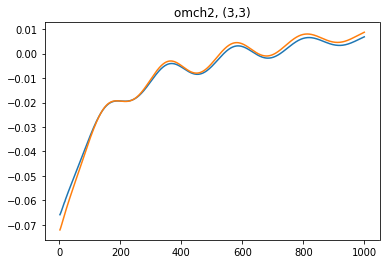

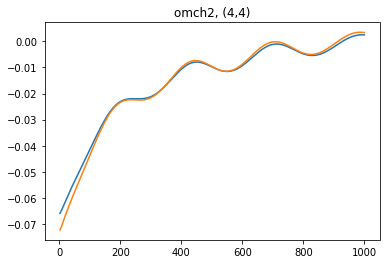

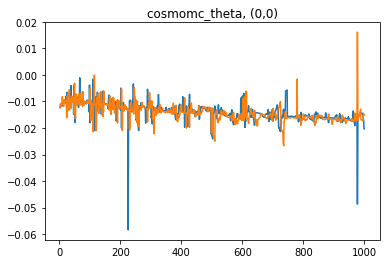

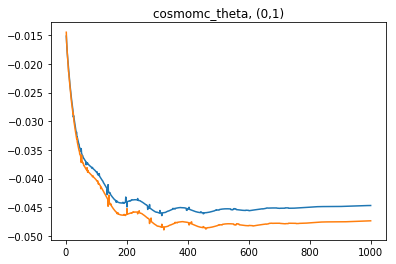

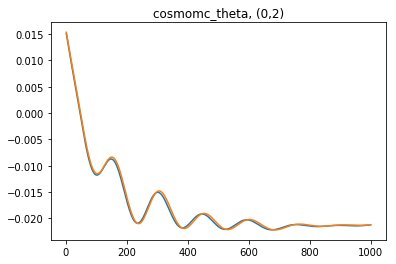

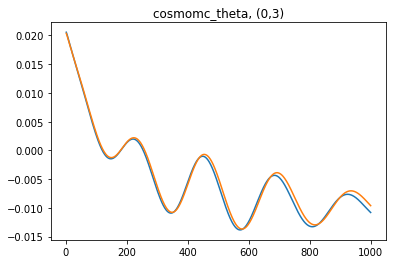

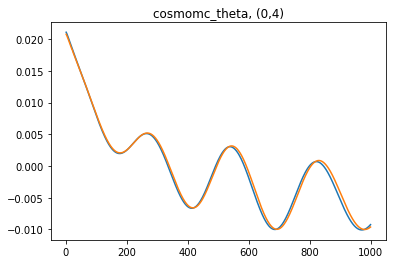

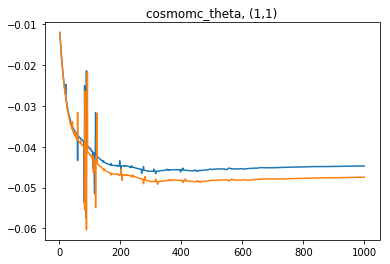

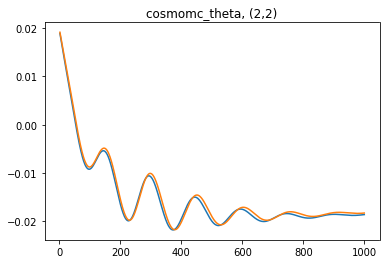

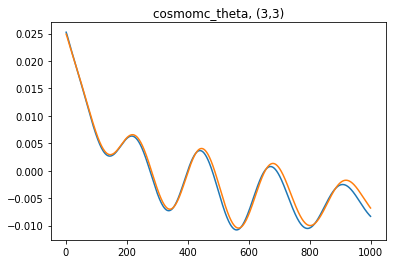

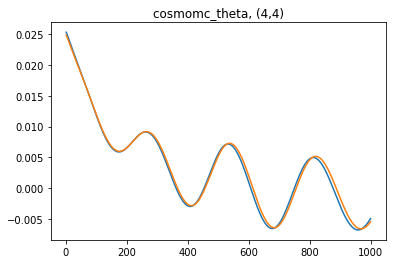

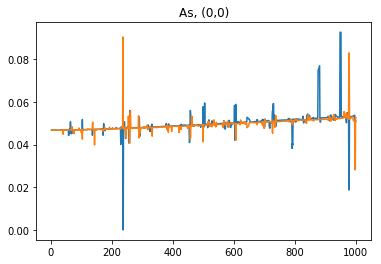

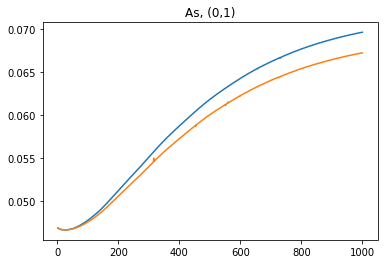

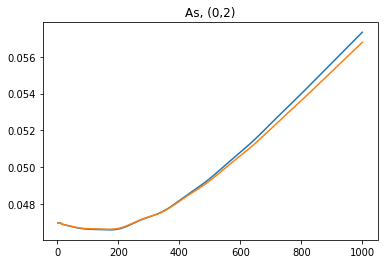

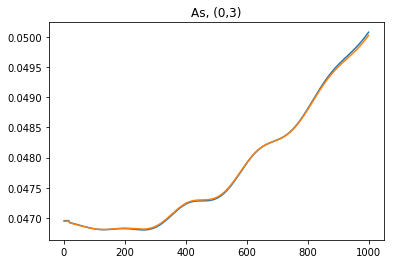

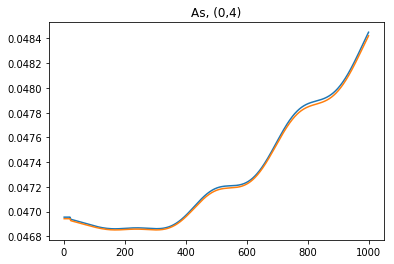

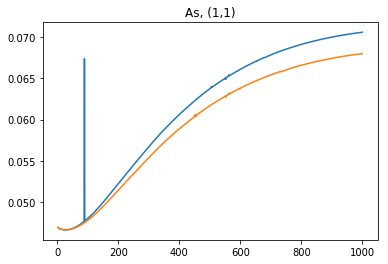

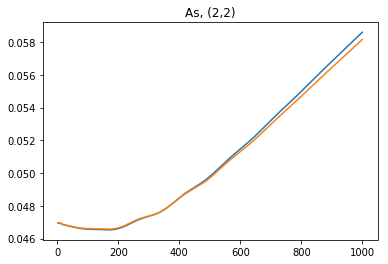

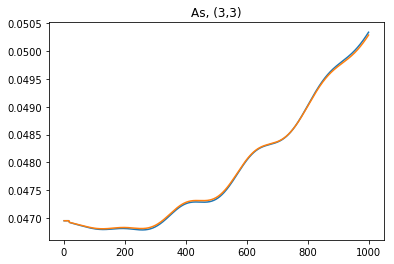

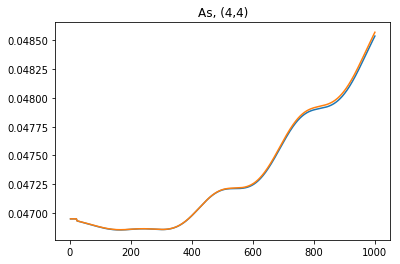

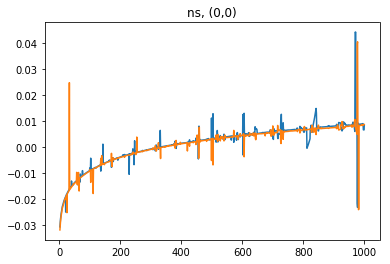

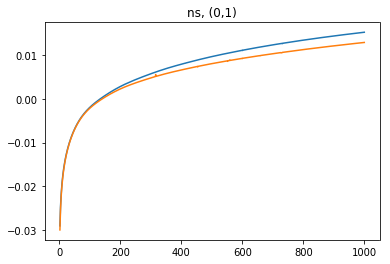

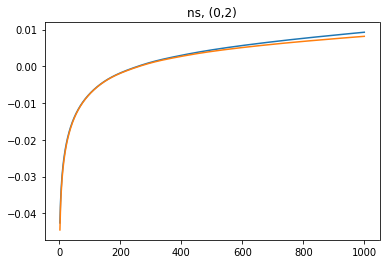

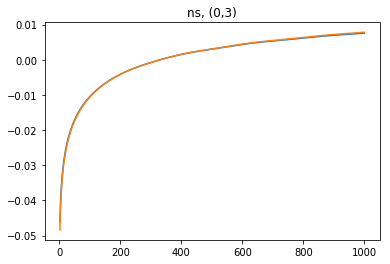

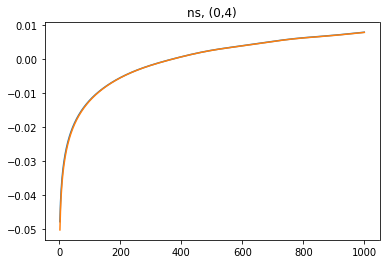

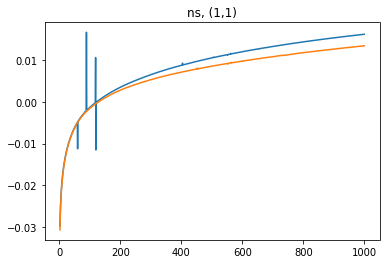

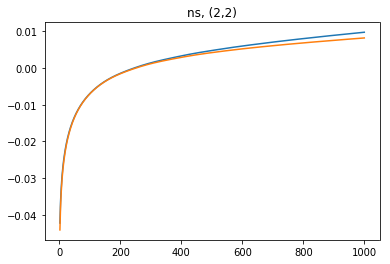

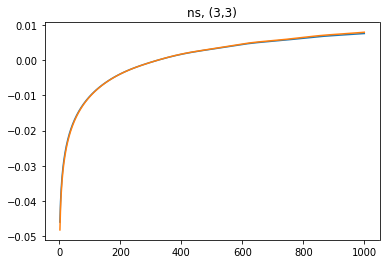

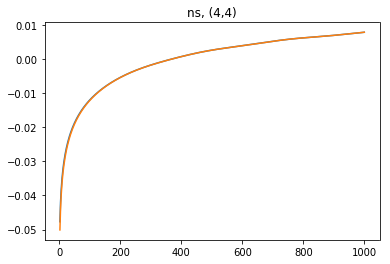

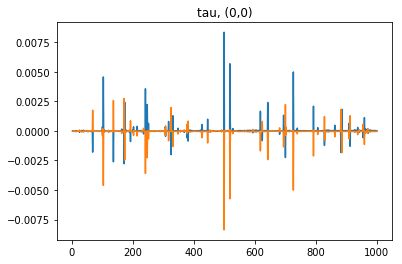

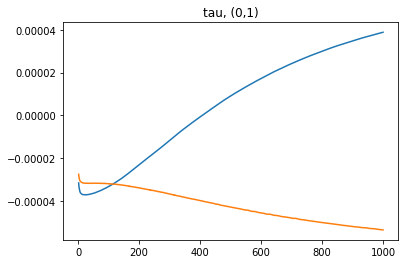

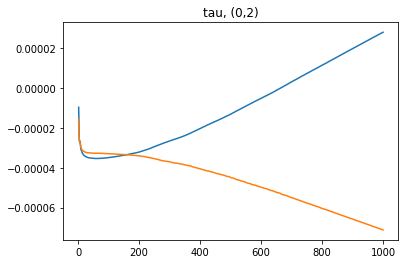

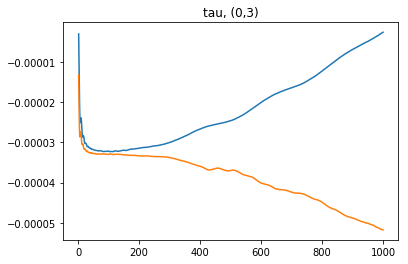

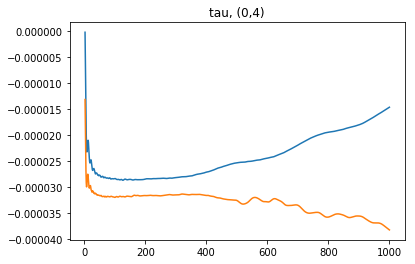

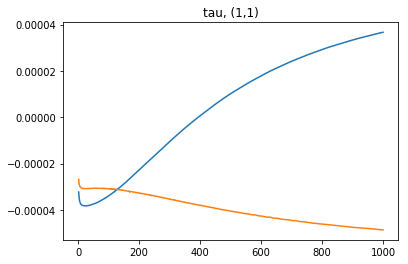

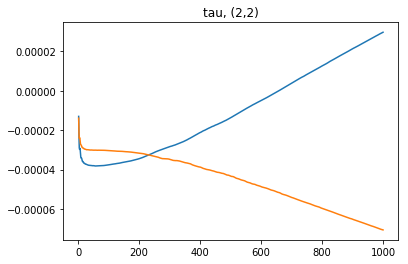

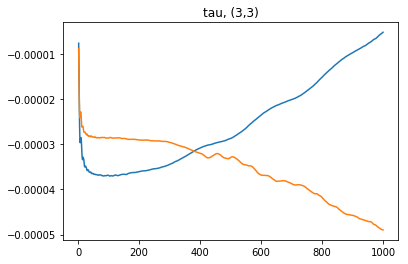

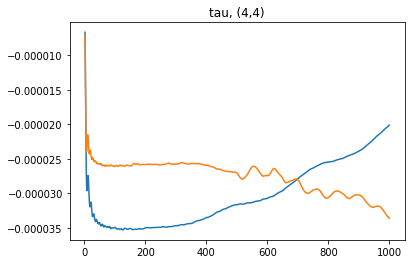

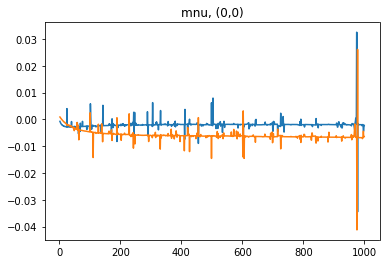

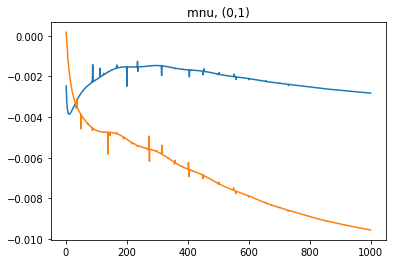

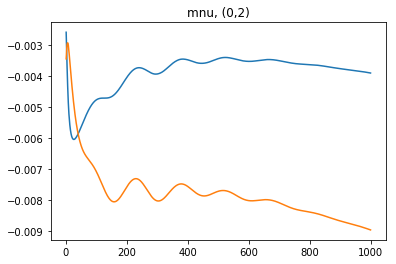

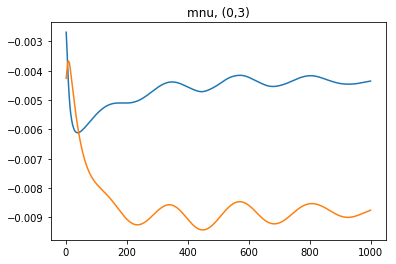

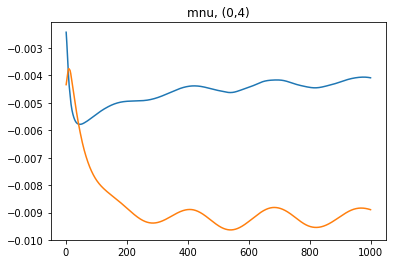

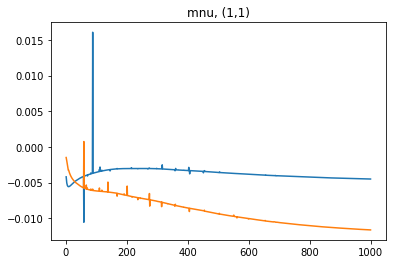

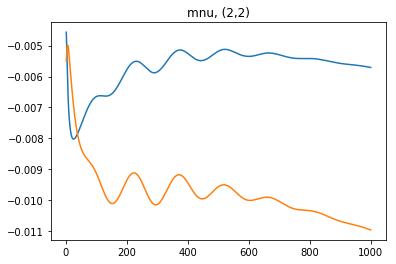

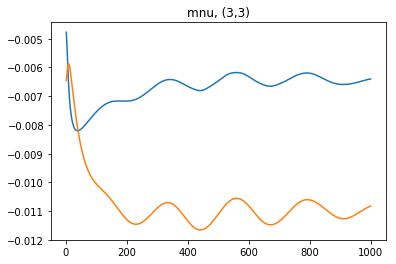

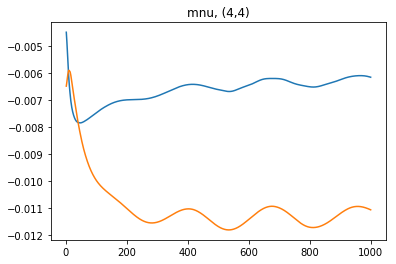

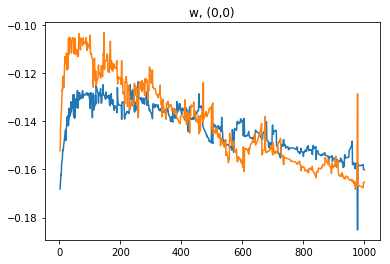

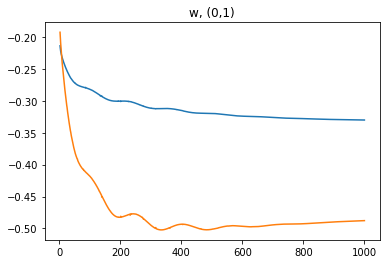

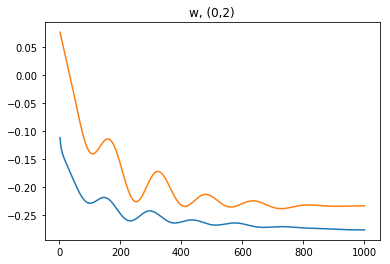

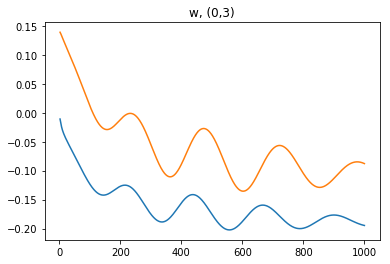

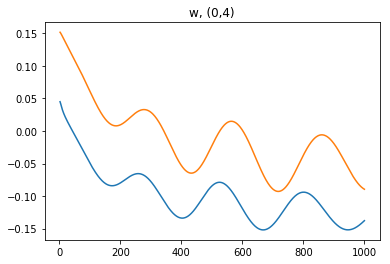

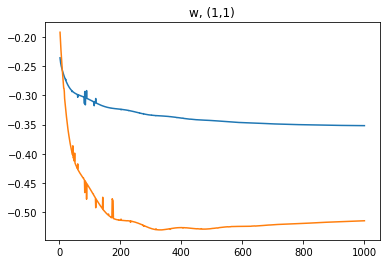

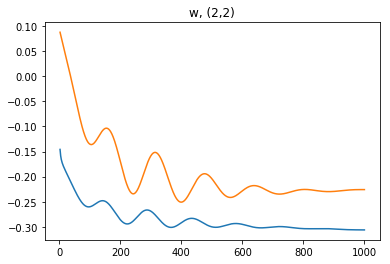

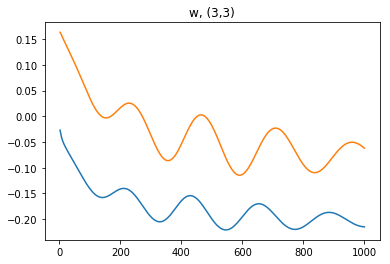

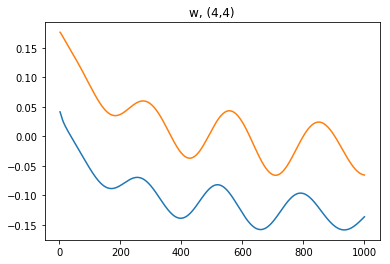

In [26]:
%matplotlib inline
for param in range(nCosParams):        
    for obs1 in range(nMaps):
        for obs2 in range(obs1,nMaps):
            if obs1 == 0 or obs1 == obs2:
                nominal = Fobj3.crossCls[obs1,obs2]
                plus = Fobj3.crossClsPlus[obs1,obs2,param]
                minus = Fobj3.crossClsMinus[obs1,obs2,param]
                plt.plot(ells,(plus-nominal)/nominal)
                plt.plot(ells,(nominal-minus)/nominal)
                plt.title(paramList[param]+', ('+str(obs1)+','+str(obs2)+')')
                plt.show()

In [27]:
# view the derivatives too
#(Obserables(Cls),Parameters,Ells)
print Fobj3.dClVecs.shape
nParams = Fobj3.nParams
print nParams
print nCosParams
nObs = nMaps*(nMaps+1)/2
print nObs

(15, 12, 999)
12
8
15


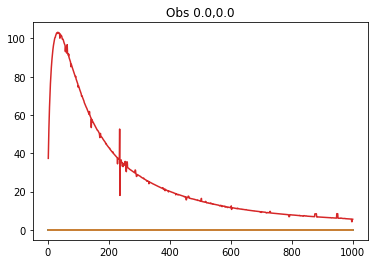

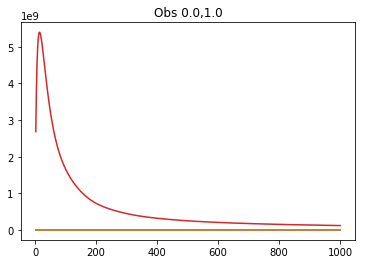

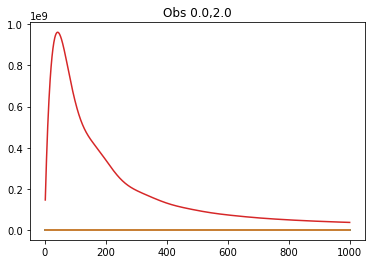

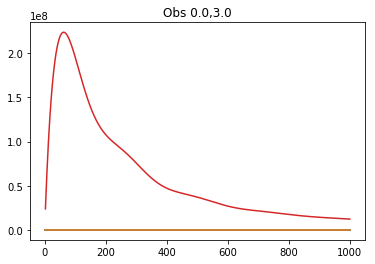

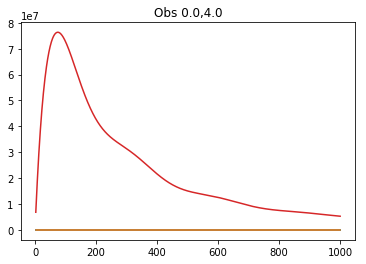

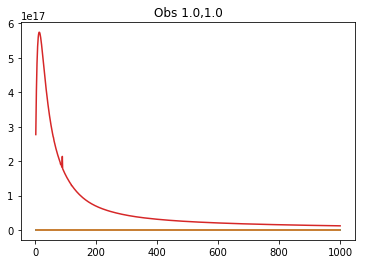

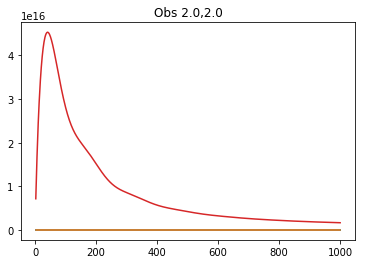

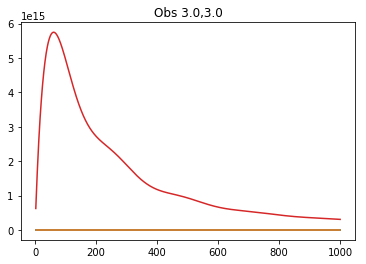

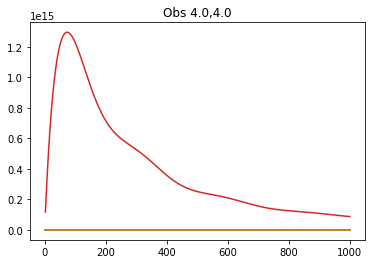

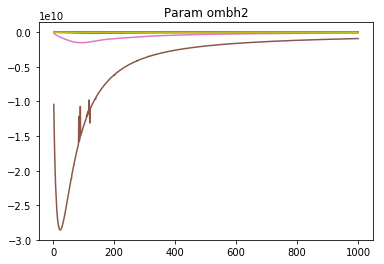

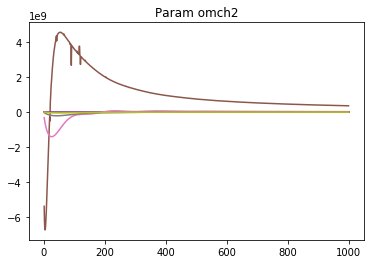

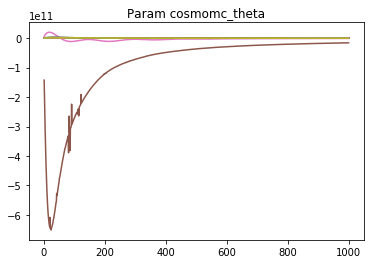

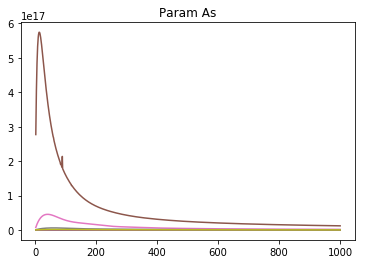

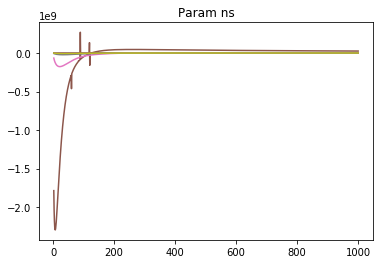

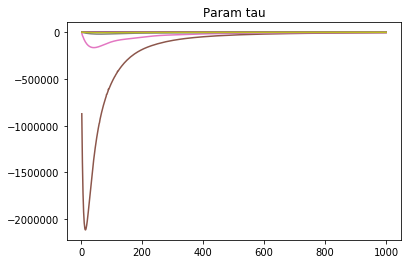

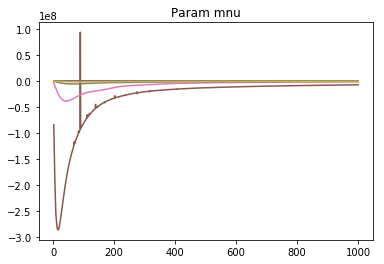

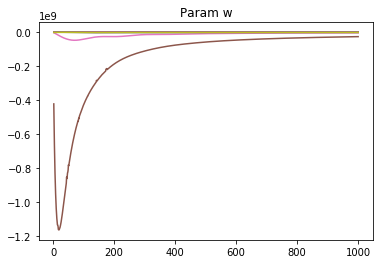

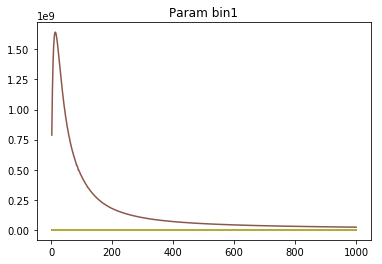

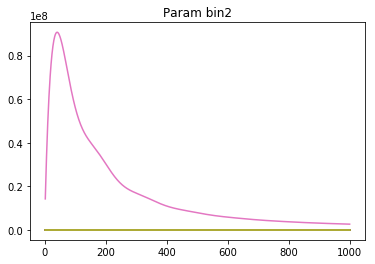

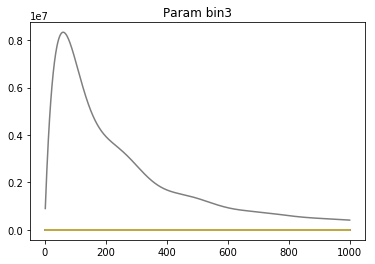

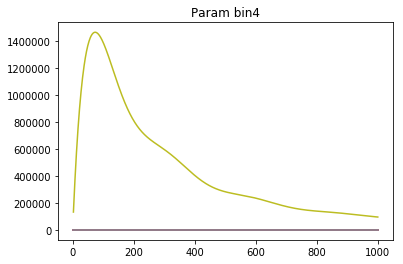

In [28]:
obsList = Fobj3.obsList
map1List = np.floor(obsList/nMaps)
map2List = obsList%nMaps

# plot one panel per observable
for obs in range(nObs):
    if map1List[obs] == 0 or map1List[obs] == map2List[obs]:
        for param in range(nParams):
            plt.plot(ells,Fobj3.dClVecs[obs,param])
        plt.title('Obs '+str(map1List[obs])+','+str(map2List[obs]))
        plt.show()
    
# plot one panel per parameter
for param in range(nParams):
    for obs in range(nObs):
        if map1List[obs] == 0 or map1List[obs] == map2List[obs]:
            plt.plot(ells,Fobj3.dClVecs[obs,param])
    plt.title('Param '+paramList[param])
    plt.show()